In [6]:
import os
import re

import alphashape
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io as io
from descartes import PolygonPatch
from matplotlib.path import Path
from shapely.geometry import MultiPolygon, Point, Polygon
from skimage.util import img_as_uint, img_as_ubyte
from skimage.transform import rotate
from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans
from tqdm import *
import seaborn as sns

In [91]:
def plot_clusters(clusters, 
                cluster_id_col = 'Epithelial cells_spatial_cluster_id', 
                clustering_cell_type = None, 
                x_col_id = 'centerX',
                y_col_id = 'centerY',
                phenotyping_column = 'phenotype',
                bg_image = None, 
                image_shape = (1000,1000), 
                sample_name = None,
                outdir=None,
                alphashape_param = 0.05,
                palette = None):
    """
    Plots spatial clusters of cells with an alphashape pertaining to each spatial cluster. 
    Counts all other cell types which lie within alphashape and outputs dataframe.
    """
    alpha=0.75
    fill_colour = 'w'
    outline_colour = 'k'
    fill = False
    if outdir is not None:
        if not os.path.exists(outdir):
            os.makedirs(outdir)

    # create figure:    
    sns.set_style("white")
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,15))
    if bg_image is not None:
        ax.imshow(bg_image)

    if palette:
        sns.scatterplot(data=clusters, x=x_col_id, y=y_col_id, hue=phenotyping_column, palette=palette, ax=ax, s=25, alpha=0.5)
    else:
        sns.scatterplot(data=clusters, x=x_col_id, y=y_col_id, hue=phenotyping_column, ax=ax, s=25, alpha=0.5)

    # get unique cluster labels:
    unique_cluster_labels = clusters[cluster_id_col].unique()
    print(unique_cluster_labels)

    # loop through labels:
    for label in unique_cluster_labels:

        if label >= 0:

            # get df for each unique label:
            single_cluster_df = clusters[clusters[cluster_id_col] == label]

            # get points of cluster:
            X = single_cluster_df['centerX'].values
            Y = single_cluster_df['centerY'].values       
            points = list(zip(X, Y))

            # only proceed if cells exist:
            if len(X) > 0:

                # create alphashape:
                alpha_shape = alphashape.alphashape(points, alphashape_param)
                
                if alpha_shape.geom_type in ['Polygon', 'MultiPolygon']: # only process Polygon and Multipolygons i.e. ignore lines of cells which cannot contain other cells
                
                    # plot points and add patch of alphashape:
                   
                    ax.add_patch(PolygonPatch(alpha_shape, fc=fill_colour,ec=outline_colour,alpha=alpha, fill=fill, lw=2))
                    # ax.scatter(single_cluster_df['centerX'].values, single_cluster_df['centerY'].values, alpha=0.5)
                    ax.scatter(single_cluster_df['centerX'].values, single_cluster_df['centerY'].values, alpha=0.5, color='k', s=3)
                    
                else:
                    ax.scatter(single_cluster_df['centerX'].values, single_cluster_df['centerY'].values, alpha=0.5)

    # update plot with title etc and save:
    title = '{}_{}_alpha_{}.png'.format(sample_name, clustering_cell_type, alphashape_param)
    # ax.set_title(title, fontsize=18)
    ax.set_xlabel('Centroid X µm')
    ax.set_ylabel('Centroid Y µm')
    ax.set_ylim(0,image_shape[0])
    ax.set_xlim(0,image_shape[1])
    ax.spines[['right', 'top']].set_visible(False)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('{}/{}_{}_alpha_{}.png'.format(outdir,sample_name, clustering_cell_type, alphashape_param))
    plt.close()
    plt.show()
    return fig

shape = get_shape(clusters)
imagename = 'P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_l_20190619-roi_24'
cType = 'Epithelial cells'
alpha = 0.05
plot_palette = rubicon_palette[phenotyping_column]

# plot_clusters(clusters, 
#             cluster_id_col = 'Epithelial cells_spatial_cluster_id', 
#             clustering_cell_type=cType, 
#             bg_image = None, 
#             image_shape=shape, 
#             sample_name = imagename, 
#             outdir=None, 
#             alphashape_param=alpha)
)

SyntaxError: unmatched ')' (2659575491.py, line 99)

/camp/home/magnesa/.conda/envs/rapids-22.02/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/camp/home/magnesa/.conda/envs/rapids-22.02/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


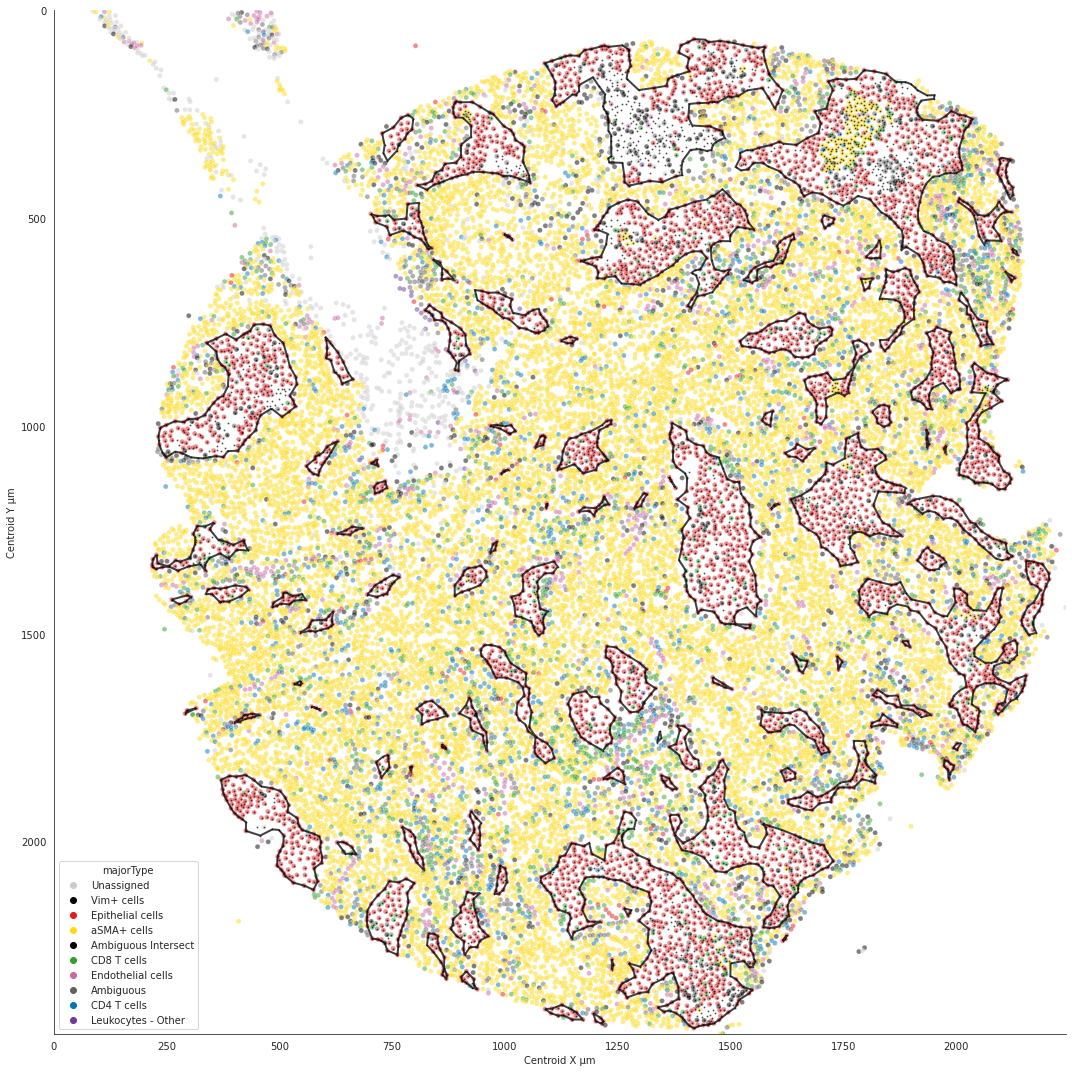

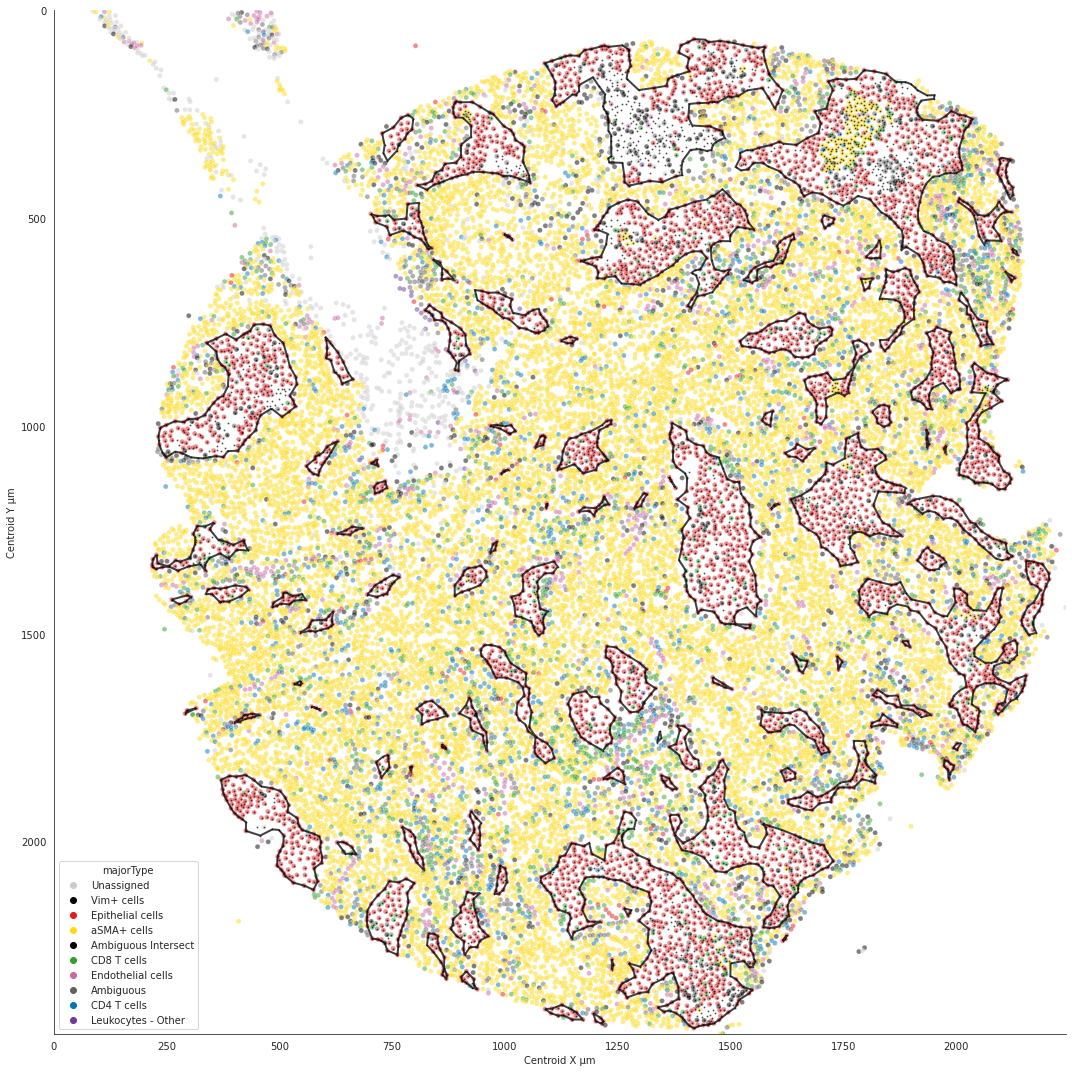

In [97]:
def plot_clusters(clusters, cluster_id_col='Epithelial cells_spatial_cluster_id', clustering_cell_type=None,
                  x_col_id='centerX', y_col_id='centerY', phenotyping_column='phenotype', bg_image=None,
                  image_shape=(1000, 1000), sample_name=None, outdir=None, alphashape_param=0.05, palette=None):

    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(15, 15))

    if bg_image is not None:
        ax.imshow(bg_image)

    if palette:
        sns.scatterplot(data=clusters, x=x_col_id, y=y_col_id, hue=phenotyping_column, palette=palette, ax=ax, s=25, alpha=0.5)
    else:
        sns.scatterplot(data=clusters, x=x_col_id, y=y_col_id, hue=phenotyping_column, ax=ax, s=25, alpha=0.5)

    unique_cluster_labels = clusters[cluster_id_col].unique()

    for label in unique_cluster_labels:
        if label >= 0:
            single_cluster_df = clusters[clusters[cluster_id_col] == label]
            points = list(zip(single_cluster_df[x_col_id], single_cluster_df[y_col_id]))

            if len(points) > 0:
                alpha_shape = alphashape.alphashape(points, alphashape_param)
                if alpha_shape.geom_type in ['Polygon', 'MultiPolygon']:
                    ax.add_patch(PolygonPatch(alpha_shape, fc='w', ec='k', alpha=0.75, lw=2, fill=False))
                    ax.scatter(single_cluster_df[x_col_id], single_cluster_df[y_col_id], alpha=0.5, color='k', s=1)
                else:
                    ax.scatter(single_cluster_df[x_col_id], single_cluster_df[y_col_id], alpha=0.5, s=1)

    ax.set_xlabel('Centroid X µm')
    ax.set_ylabel('Centroid Y µm')
    ax.set_ylim(0, image_shape[0])
    ax.set_xlim(0, image_shape[1])
    ax.spines[['right', 'top']].set_visible(False)
    plt.gca().invert_yaxis()
    plt.tight_layout()

    if outdir is not None:
        os.makedirs(outdir, exist_ok=True)
        if sample_name and clustering_cell_type:
            title = f'{sample_name}_{clustering_cell_type}_alpha_{alphashape_param}.png'.replace(' ', '_')
            plt.savefig(os.path.join(outdir, title))

    plt.show()
    plt.close(fig)
    return fig

shape = get_shape(clusters)
imagename = 'P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_l_20190619-roi_24'
cType = 'Epithelial cells'
alpha = 0.05
plot_palette = rubicon_palette[phenotyping_column]

plot_clusters(clusters, 
            cluster_id_col = 'Epithelial cells_spatial_cluster_id', 
            clustering_cell_type = cType, 
            x_col_id = 'centerX',
            y_col_id = 'centerY',
            phenotyping_column = phenotyping_column,
            bg_image = None, 
            image_shape = shape, 
            sample_name = imagename,  
            outdir='.', 
            alphashape_param = 0.05,
            palette = plot_palette)

# plot_clusters(clusters, 
#             cluster_id_col = 'Epithelial cells_spatial_cluster_id', 
#             clustering_cell_type = cType, 
#             x_col_id = 'centerX',
#             y_col_id = 'centerY',
#             phenotyping_column = phenotyping_column,
#             bg_image = None, 
#             image_shape = shape, 
#             sample_name = imagename,  
#             outdir=None, 
#             alphashape_param = 0.05,
#             palette = None)

<AxesSubplot:xlabel='centerX', ylabel='centerY'>

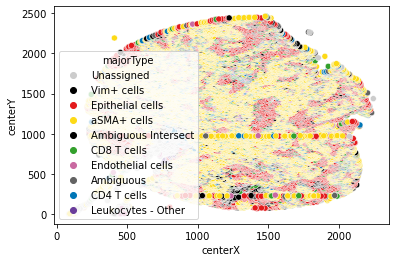

In [62]:
import seaborn as sns
phenotyping_column = 'majorType'
x_col_id = 'centerX'
y_col_id = 'centerY'
sns.scatterplot(data=clusters, x=x_col_id, y=y_col_id, hue=phenotyping_column, palette=rubicon_palette[phenotyping_column])

In [61]:
rubicon_palette[phenotyping_column]['Ambiguous Intersect'] = '#000000'
rubicon_palette[phenotyping_column]['Vim+ cells'] = '#000000'

In [55]:
import json

# load rubicon palette from json file
with open("RUBICON_palette.json", "r") as f:
    rubicon_palette = json.load(f)

In [57]:
rubicon_palette['majorType']

{'CD8 T cells': '#33a02c',
 'CD4 T cells': '#0076B6',
 'T cells - Other': '#B2DF8A',
 'B cells': '#30CED8',
 'Macrophages': '#FDDA16',
 'Monocytes': '#FB9A99',
 'Myeloid cells - Other': '#FF7F00',
 'CD4+ Myeloid cells': '#FF7F00',
 'Leukocytes - Other': '#6A3D9A',
 'aSMA+ cells': '#FDDA16',
 'Mesenchymal cells - Other': '#003399',
 'Endothelial cells': '#C969A1',
 'Epithelial cells': '#E31A1C',
 'Ambiguous': '#636363',
 'Unassigned': '#CCCCCC'}

In [43]:
image = io.imread('/camp/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/release_testing/deep-imcyto/2023-08-07_enlarged_test_dataset/results/deep-imcyto/MCCS/pseudo_HandE/P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_l_20190619-roi_24.png')



In [86]:
clusters = pd.read_csv('/camp/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/revision_testing/magnesa/2023-08-10_spatial_phlex/results/Spatial-PHLEX/PHLEX_example/spatial_clustering/cellType/dbscan_25/min_size_1/alpha_0.05/Epithelial cells/P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_l_20190619-roi_24/P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_l_20190619-roi_24_object_cluster_assignment.csv', sep='\t')



In [17]:
clusters['imagename'].unique()

array(['P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_l_20190619-roi_24'],
      dtype=object)

In [18]:
def get_shape(objects, x_coord="centerX", y_coord="centerY"):
    """Get shape of image from maximum x and y coordinates in objects file.
    Return as tuple (rows, columns).)"""
    return (objects[y_coord].max(), objects[x_coord].max())


KeyError: "None of [Int64Index([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1,\n            ...\n            -1, -1, -1, -1, -1, -1,  2, -1, -1, -1],\n           dtype='int64', length=27802)] are in the [columns]"

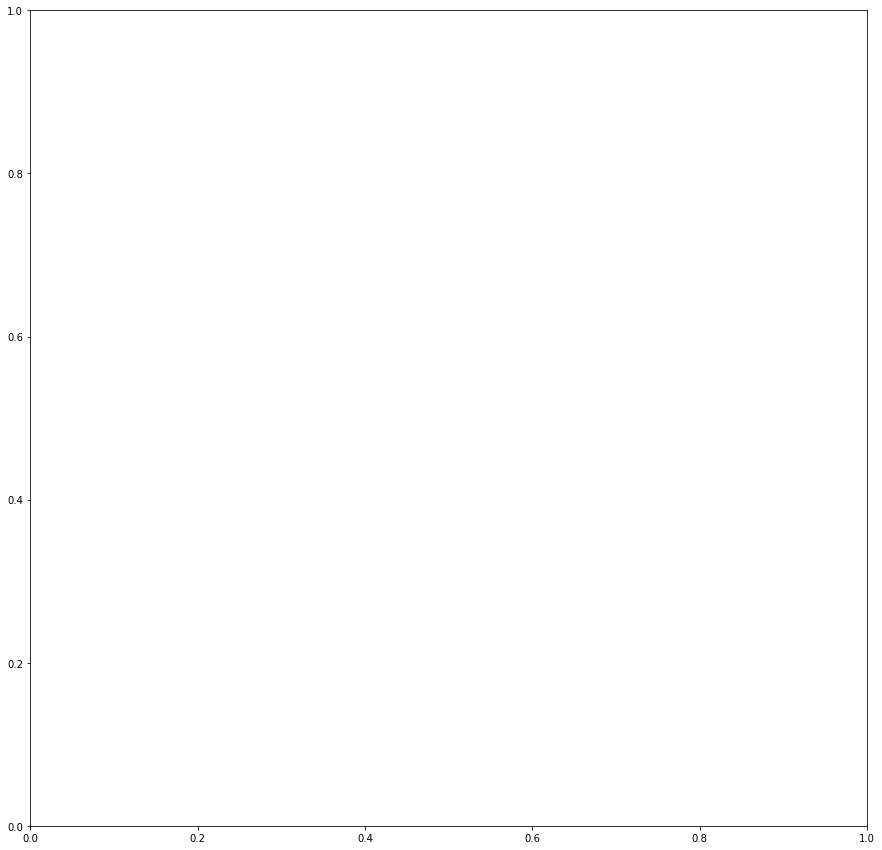

In [30]:
shape = get_shape(clusters)
imagename = 'P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_l_20190619-roi_24'
cType = 'Epithelial cells'
alpha = 0.05
plot_clusters(clusters, clusters['Epithelial cells_spatial_cluster_id'].values, clustering_cell_type=cType, image_shape=shape, sample_name = imagename, outdir=None, alphashape_param=alpha)

In [24]:
clusters

Unnamed: 0                                          imagename  object  \
0           40243  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...       1   
1           40244  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...      10   
2           40245  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...     100   
3           40246  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...    1000   
4           40247  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...   10000   
...           ...                                                ...     ...   
27797       68040  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...    9995   
27798       68041  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...    9996   
27799       68042  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...    9997   
27800       68043  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...    9998   
27801       68044  P1_TMA006_L_20190619-roi_24.ome-roi_p1_tma006_...    9999   

           centerX     centerY  region         majorType            cellType  \
0        87.451613    1.645161     NaN        Unassigned          Unassigned   
1       416.375000    5.156250     NaN        Vim+ cells  Vim+ cells - Other   
2      1462.341880   80.085470     NaN  Epithelial cells    Epithelial cells   
3      1676.412371  229.577320     NaN       aSMA+ cells         aSMA+ cells   
4       868.101695  975.661017     NaN        Unassigned          Unassigned   
...            ...         ...     ...               ...                 ...   
27797   245.253247  977.636364     NaN       aSMA+ cells         aSMA+ cells   
27798   458.166667  974.461538     NaN  Epithelial cells    Epithelial cells   
27799   650.255814  973.976744     NaN  Epithelial cells    Epithelial cells   
27800   765.281250  974.947917     NaN        Unassigned          Unassigned   
27801   798.424242  973.515152     NaN        Unassigned          Unassigned   

                                                positive  \
0                                                 CD45RA   
1                                              collagen1   
2      B2M_CCR7_CXCL12_CXCR4_CXCR6_FAP1_GATA3_GZMB_Ki...   
3                                         aSMA_collagen1   
4                                      CD45RA_GATA3_GZMB   
...                                                  ...   
27797                                     aSMA_collagen1   
27798             B2M_CCR7_CXCL12_CXCR6_panCK_PD1_pSTAT1   
27799                                       CXCL12_panCK   
27800                                             CD45RA   
27801                                                NaN   

       Epithelial cells_spatial_cluster_id  Epithelial cells_cluster_area  \
0                                       -1                            NaN   
1                                       -1                            NaN   
2                                        0                   83330.851804   
3                                       -1                            NaN   
4                                       -1                            NaN   
...                                    ...                            ...   
27797                                   -1                            NaN   
27798                                    2                   48574.293678   
27799                                   -1                            NaN   
27800                                   -1                            NaN   
27801                                   -1                            NaN   

       nearest Epithelial cells_cluster_id  \
0                                       17   
1                                       17   
2                                        0   
3                                        7   
4                                       10   
...                                    ...   
27797                                    2   
27798                                    2   
27799                    